In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # to add print titles on the charts
import seaborn as sns 

In [3]:
# read the data

users_data = pd.read_pickle("../data/users_data_final.pkl")
users_data.head()

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,None,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,1995-08-01,mobile


In [4]:
# summary of the data

users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

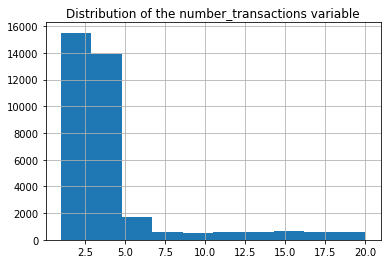

In [24]:
# distribution of the number_transactions variable which is skewed

users_data.number_transactions.hist()
plt.title("Distribution of the number_transactions variable");

In [27]:
users_data.number_transactions.describe()

count    35210.000000
mean         3.977052
std          3.814329
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         20.000000
Name: number_transactions, dtype: float64

In [65]:
# 25th percentile

q1 = np.nanpercentile(users_data.number_transactions, 25)
q1

2.0

In [66]:
# 75th percentile

q3 = np.nanpercentile(users_data.number_transactions, 75)
q3

4.0

In [67]:
# interquartile range

iqr = q3 - q1
iqr

2.0

In [68]:
# calculating the upper bound

ub = q3 + 1.5*iqr
ub

7.0

In [69]:
# calculating the lower bound

lb = q1 - 1.5*iqr
lb

-1.0

In [49]:
# calculates the upper and lower bound for a skewed variable

q1 = np.nanpercentile(users_data.number_transactions, 25)
q3 = np.nanpercentile(users_data.number_transactions, 75)
iqr = q3 - q1
    
ub = q3 + 1.5*iqr
lb = q1 - 1.5*iqr
    
print("The lower bound is:", lb)
print("The upper bound is:", ub)

The lower bound is: -1.0
The upper bound is: 7.0


In [80]:
def identify_upper_and_lower_bound(df, var):
    """This definition calculates the outliers of a variable using iqr
    
    @param df pandas DataFrame
    @param var str 
    
    """
    
    q1 = np.nanpercentile(df[var], 25)
    q3 = np.nanpercentile(df[var], 75)
    iqr = q3 - q1
    
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr
    
    print(f"The upper bound for {var} is:", ub)
    print(f"The lower bound for {var} is:", lb)

In [81]:
identify_upper_and_lower_bound(users_data, "age")

The upper bound for age is: 70.5
The lower bound for age is: 10.5


In [46]:
ub, lb = identify_outliers(users_data, "number_transactions")

The lower bound is: -1.0
The upper bound is: 7.0


In [ ]:
# TO DO: Write a unit test to check output of definition is as expected

/Users/shaq/.pyenv/versions/3.8.10/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


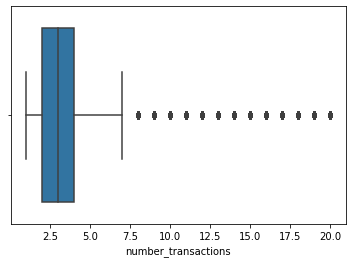

In [52]:
# Group can go through this afternoon or we will pick up tomorow...

# check the visualisation to see if outliers exist

sns.boxplot(users_data.number_transactions);

In [57]:
# examples where the data has values above the UB
# 3716 cases where number transactions greater than upper bound

users_data[users_data.number_transactions > ub].shape[0]

3716

In [58]:
# 0 cases where number transactions less than lower bound

users_data[users_data.number_transactions < lb].shape[0]

0

In [62]:
# remove the outliers

users_data_wout_outliers = users_data[users_data.number_transactions <= ub]
users_data_wout_outliers.head()

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,1995-08-01,mobile
5,c6aee0d4-2a86-4bac-827b-c6d33b5933e6,2.0,231.0,35,management,married,tertiary,False,True,False,None,139,1,-1,0,None,False,2000-06-21,desktop
6,1fa7d4fb-3e4a-463a-ba4b-08f824945e45,2.0,447.0,28,management,single,tertiary,False,True,True,None,217,1,-1,0,None,False,1996-02-22,mobile


In [64]:
print(users_data.shape)
print(users_data_wout_outliers.shape)

(45209, 19)
(31494, 19)


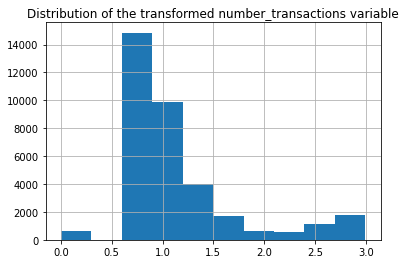

In [26]:
np.log(users_data.number_transactions).hist()
plt.title("Distribution of the transformed number_transactions variable");